<a href="https://colab.research.google.com/github/HadeelJS/House-price-prediction/blob/main/Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House Price prediction model

Step 1: Importing essential libraries:

In [1]:
import numpy as np #mathematical operations
import pandas as pd #for reading and analyzing data
import matplotlib.pyplot as plt #for data visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Step 2: Uploading and exploring my dataset

In [2]:
#read my dataset
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
Dataset=pd.read_excel(r'/content/gdrive/My Drive/projectDataset.xlsx')
Dataset.head()

Mounted at /content/gdrive


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
#checking if there are null values
print(Dataset.isnull().any())

X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool


In [4]:
#basic information about my dataset
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [5]:
#exploring the relationship between veriables
Dataset.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


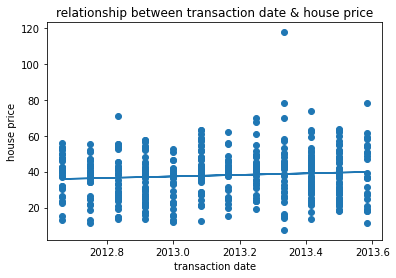

In [6]:
x=Dataset['X1 transaction date']
y=Dataset['Y house price of unit area']
plt.scatter(x,y)
plt.xlabel("transaction date")
plt.ylabel("house price")
plt.title("relationship between transaction date & house price")

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x))

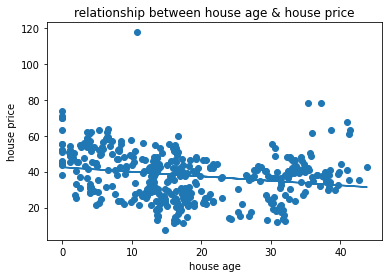

In [7]:
x=Dataset['X2 house age']
y=Dataset['Y house price of unit area']
plt.scatter(x,y)
plt.xlabel("house age")
plt.ylabel("house price")
plt.title("relationship between house age & house price")

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x))

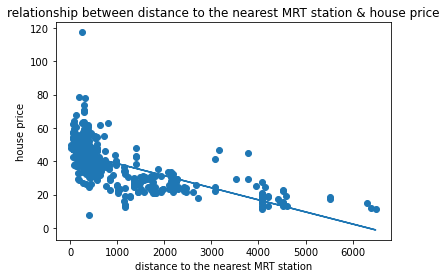

In [8]:
x=Dataset['X3 distance to the nearest MRT station']
y=Dataset['Y house price of unit area']
plt.scatter(x,y)
plt.xlabel("distance to the nearest MRT station")
plt.ylabel("house price")
plt.title("relationship between distance to the nearest MRT station & house price")

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x))

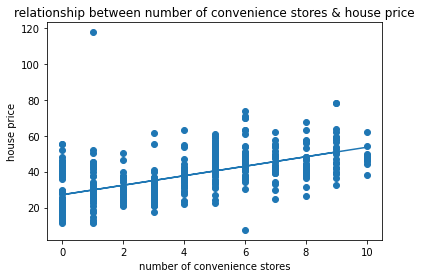

In [9]:
x=Dataset['X4 number of convenience stores']
y=Dataset['Y house price of unit area']
plt.scatter(x,y)
plt.xlabel("number of convenience stores")
plt.ylabel("house price")
plt.title("relationship between number of convenience stores & house price")

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x))

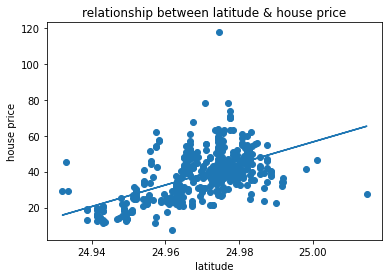

In [10]:
x=Dataset['X5 latitude']
y=Dataset['Y house price of unit area']
plt.scatter(x,y)
plt.xlabel("latitude")
plt.ylabel("house price")
plt.title("relationship between latitude & house price")

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x))

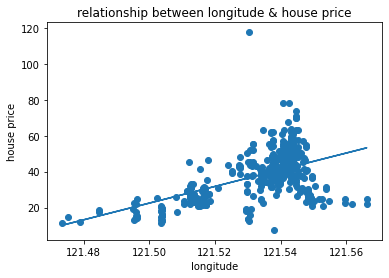

In [11]:
x=Dataset['X6 longitude']
y=Dataset['Y house price of unit area']
plt.scatter(x,y)
plt.xlabel("longitude")
plt.ylabel("house price")
plt.title("relationship between longitude & house price")

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x))

Step 3: preparing my data

In [12]:
#Defining X and Y 
X=np.array(Dataset.drop(['X1 transaction date','Y house price of unit area'],axis=1))
Y=np.array(Dataset['Y house price of unit area'])
print(X)
print(Y)

[[ 32.       84.87882  10.       24.98298 121.54024]
 [ 19.5     306.5947    9.       24.98034 121.53951]
 [ 13.3     561.9845    5.       24.98746 121.54391]
 ...
 [ 18.8     390.9696    7.       24.97923 121.53986]
 [  8.1     104.8101    5.       24.96674 121.54067]
 [  6.5      90.45606   9.       24.97433 121.5431 ]]
[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   51.8
  59.5  34.6  51.   62.2  38.2  32.9  54.4  45.7  30.5  71.   47.1  26.6
  34.1  28.4  51.6 

In [13]:
#Spliting my data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

Step 4: building and training the linear regression model

In [14]:
#Uploading the model
LinReg_model=LinearRegression()
LinReg_model.fit(X_train,Y_train)

LinearRegression()

In [15]:
#Model Evaluation
#prediction on training data
Training_data_prediction = LinReg_model.predict(X_train)
#calculating the error produced in the model
error = metrics.r2_score(Y_train, Training_data_prediction)
print('model error score is:', error)

model error score is: 0.5718446796705245


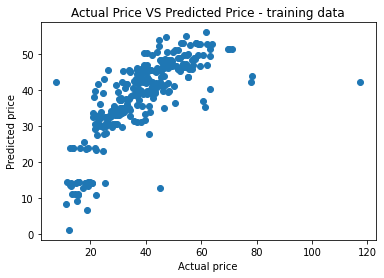

In [16]:
#Visualize the actual prices VS predicted prices
plt.scatter(Y_train, Training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual Price VS Predicted Price - training data')
plt.show()

In [17]:
#Prediction on testing data
Testing_data_prediction = LinReg_model.predict(X_test)
#calculating the error produced in the model
error = metrics.r2_score(Y_test, Testing_data_prediction)
print('model error score is:', error)

model error score is: 0.5558392151412601


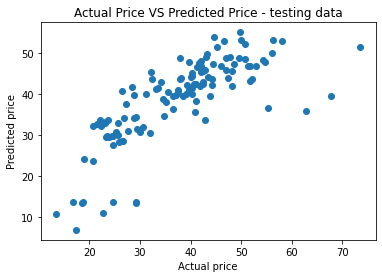

In [18]:
#Visualize the actual prices VS predicted prices
plt.scatter(Y_test, Testing_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual Price VS Predicted Price - testing data')
plt.show()

Step 5: building a predictive system

In [ ]:
print("House Price Prediction:")
a=input("house age: ")
b=input("distance to the nearest MRT station: ")
c=input("number of convenience stores: ")
d=input("latitude: ")
e=input("longitude")
features = np.array([a,b,c,d,e])
features_reshaped=features.reshape(1,-1)
print("Predicted house price of unit area is: ", LinReg_model.predict(features_reshaped))

House Price Prediction:
